In [2]:
import pandas as pd
import numpy as np
from DKS import *
from solver import *

ImportError: attempted relative import with no known parent package

In [138]:
df_date = pd.read_excel("../Показатели для ДКС.xlsx", sheet_name='Лист2')

In [139]:
bound_dict = {
    'power':(
        np.array([16000, 16000]),
        np.array([7000, 7000]),
        200),
    'comp':(
        np.array([1.9, 1.9]),
        np.array([1, 1]),
        0.01),
    'udal':(
        np.array([100, 100]),
        np.array([0, 0]),
        1.0),    
    'freq_dimm':(
        np.array([1.05, 1.05]),    
        np.array([0.7, 0.7]),
        0.01),
    'p_out':(
        np.array([4.5, 6.5]),    
        np.array([0.1, 0.1]),
        0.1),
    'target':(
        np.array([10, 10]),    
        np.array([-10, -10]),
        0.1),
}
conf_solv_obj = ConfGDHSolver([
        (GdhInstance.create_by_csv('../DKS_math/Test/spch_dimkoef/ГПА-ц3-16С-45-1.7(ККМ).csv'), 4),
        (GdhInstance.create_by_csv('../DKS_math/Test/spch_dimkoef/CGX-425-16-65-1.7СМП(ПСИ).csv'), 4),
        ],
        bound_dict
        )
df_conf = []
df_data_mode = df_date.loc[:23, ('Расход, млн', 'Pвх, бар', 'Pвых,бар', 'T', 'R', 'K')]
for q_rate, p_in, p_out in list(zip(df_data_mode['Расход, млн'], df_data_mode['Pвх, бар'], df_data_mode['Pвых,бар'])):
    mode = Mode(q_rate, p_in,  288, 512, 1.31, p_out)
    df = conf_solv_obj.get_calc_work_mode(mode)
    df_conf.append(df)
df_conf
# df_res = pd.concat(df_conf)
# df_res

[          power      comp volume_rate       udal         freq freq_dimm  \
 0  12687.260892  1.162132  752.687031      100.0  4466.156354  0.842671   
 1   7000.000004  1.316067  326.222606  85.885865   3924.53432  0.740478   
 
        p_in     p_out                                              title  \
 0  3.096555  3.598606  ../DKS_math/Test/spch_dimkoef/ГПА-ц3-16С-45-1....   
 1  3.538606  4.657043  ../DKS_math/Test/spch_dimkoef/CGX-425-16-65-1....   
 
      target work_gpa  
 0  0.926001        1  
 1  0.132436        2  ,
           power      comp volume_rate       udal         freq freq_dimm  \
 0  15854.675787  1.191539  815.923146      100.0  4841.375221  0.913467   
 1   7000.000019  1.286587   344.26772  98.783141  3920.311441  0.739681   
 
        p_in     p_out                                              title  \
 0  3.041408  3.623957  ../DKS_math/Test/spch_dimkoef/ГПА-ц3-16С-45-1....   
 1  3.563957  4.585342  ../DKS_math/Test/spch_dimkoef/CGX-425-16-65-1....   
 
 

In [4]:
import pandas as pd
import numpy as np
df_case = pd.read_excel("../Показатели для ДКС.xlsx", sheet_name='Лист2')
df_data = df_case.loc[:23, ('Pвх, бар', 'Расход, млн', 'Pвых,бар', 'T', 'R', 'K', 'СПЧ',  'Вн. мощность, кВт', 'Степень сжатия, д. ед.', 'Частота, об/мин', 'Начальное давление, МПа', 'Конечное давление, МПа','Кол-ов рабочих нагнетателей, шт')]
df_res_1, df_res_2 = pd.DataFrame(), pd.DataFrame()

for column in df_data.columns[6:]:
    for ind, row in df_data[column].iteritems():
        df_data_values = df_data[column][ind].split('+') 
        df_res_1.at[ind, f'{column}'] = df_data_values[0]
        df_res_2.at[ind, f'{column}'] = df_data_values[1]
df_res = pd.concat([df_res_1, df_res_2], axis=1, keys=[0, 1]).stack()
df_1 = df_res.reset_index()

df_data_2 = df_data.loc[:, ('Расход, млн', 'Pвх, бар', 'Pвых,бар', 'T', 'R', 'K')]
df_data_2.columns = ['Q', 'P_in', 'P_target', 'T', 'R', 'K']
res_df_2 = pd.DataFrame(df_data_2.stack())
df_2 = res_df_2.reset_index()

df_bound = pd.DataFrame({'gpa_max_cnt': [3, 4],
                         'bound_power_max': [16000, 16000],
                         'bound_power_min': [7000, 7000],
                         'bound_comp_max': [1.9, 1.9],
                         'bound_comp_min': [1, 1],
                         'bound_udal_max': [100, 100],
                         'bound_udal_min': [0, 0],                         
                         'bound_freq_max': [1.05, 1.05],
                         'bound_freq_min': [0.7, 0.7],
                         'bound_p_out_max': [4.5, 6.5],
                         'bound_p_out_min': [0.1, 0.1],
                         'bound_target_max': [10, 10],
                         'bound_target_min': [-10, -10],
                         })
df_3 = (pd.concat([df_bound.T]*14, keys=range(0,14))).reset_index()

df_ob = pd.concat([df_2, df_1, df_3], axis=0)
df_result = df_ob.sort_values(by=['level_0', 'level_1'])
df_result = df_result.set_index(['level_0'])

for i in range(14):
    df_t = df_result[df_result.index == i]
    filename = f'case_{i+1}.txt'
    df_t.to_csv(f'./Test/Fixture/{filename}',sep='\t')

C:\Users\M_Anisimova\AppData\Local\Temp\ipykernel_7104\99513578.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ind, row in df_data[column].iteritems():
C:\Users\M_Anisimova\AppData\Local\Temp\ipykernel_7104\99513578.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ind, row in df_data[column].iteritems():
C:\Users\M_Anisimova\AppData\Local\Temp\ipykernel_7104\99513578.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ind, row in df_data[column].iteritems():
C:\Users\M_Anisimova\AppData\Local\Temp\ipykernel_7104\99513578.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ind, row in df_data[column].iteritems():
C:\Users\M_Anisimova\AppData\Local\Temp\ipykernel_7104\99513578.py:8: FutureWarning: iteritems is deprecated and will be removed in 

In [57]:
df_case = pd.read_csv('../DKS_math/Test/Fixture/case_1.txt', sep='\t')
df_case                      

,level_0,level_1,0,1
0,0,K,1.31,NaN
1,0,P_in,3.09655498953779,NaN
2,0,P_target,4.52460708334446,NaN
3,0,Q,34.6247653881433,NaN
4,0,R,512.0,NaN
5,0,T,288.0,NaN
6,0,bound_comp_max,1.9,1.9
7,0,bound_comp_min,1.0,1.0
8,0,bound_freq_max,1.05,1.05
9,0,bound_freq_min,0.7,0.7


In [140]:
df_case = pd.read_excel("../Показатели для ДКС.xlsx", sheet_name='Лист2')
df_data = df_case.loc[:23, ('Pвх, бар', 'Расход, млн', 'Pвых,бар', 'T', 'R', 'K', 'СПЧ',  'Вн. мощность, кВт', 'Степень сжатия, д. ед.', 'Частота, об/мин', 'Начальное давление, МПа', 'Конечное давление, МПа','Кол-ов рабочих нагнетателей, шт','Удаленность от точки помпажа, д. ед', 'Объемный расход, м3/мин')]
df_res_1, df_res_2 = pd.DataFrame(), pd.DataFrame()

for column in df_data.columns[6:]:
    for ind, row in df_data[column].iteritems():
        df_data_values = df_data[column][ind].split('+') 
        df_res_1.at[ind, f'{column}'] = df_data_values[0]
        df_res_2.at[ind, f'{column}'] = df_data_values[1]
df_res_case = pd.concat([df_res_1, df_res_2], axis=1, keys=[0, 1]).stack(level=0)
df_res_case

Вн. мощность, кВт Кол-ов рабочих нагнетателей, шт Конечное давление, МПа  \
0  0             12116                               1                   3.61   
   1              7151                               2                   4.72   
1  0             15333                               1                   3.65   
   1              7483                               2                   4.73   
2  0              8790                               1                   3.51   
   1              7150                               2                   4.78   
3  0              7098                               1                   4.04   
   1              7312                               1                   5.15   
4  0              7146                               1                   4.11   
   1              7011                               1                   5.25   
5  0              7022                               1                   4.08   
   1              7115                               1                   5.22   
6  0              7027                               1                   4.17   
   1              7016                               1                   5.44   
7  0              7073                               1                   4.12   
   1              7065                               1                   5.32   
8  0              7068                               1                   3.99   
   1              7723                               1                   5.14   
9  0             10869                               1                   3.49   
   1              7082                               2                   4.63   
10 0              7020                               2                   3.83   
   1              7372                               2                   4.92   
11 0              7106                               2                   3.83   
   1              7212                               2                    4.9   
12 0             14292                               1                   3.48   
   1              7152                               2                   4.54   
13 0              7948                               1                   3.73   
   1             11533                               1                   5.26   
14 0              7105                               1                    3.7   
   1             10380                               1                   5.11   
15 0             16948                               2                   3.29   
   1              9659                               3                    4.7   
16 0              7673                               2                   3.54   
   1              7197                               2                   4.72   
17 0             12064                               3                    2.6   
   1             11243                               4                   4.81   

     Начальное давление, МПа Объемный расход, м3/мин  \
0  0                     3.1                     727   
   1                    3.55                     336   
1  0                    3.04                     790   
   1                    3.59                     353   
2  0                    3.11                     654   
   1                    3.45                     312   
3  0                     3.1                     412   
   1                    3.98                     337   
4  0                    3.11                     394   
   1                    4.05                     318   
5  0                    3.11                     397   
   1                    4.02                     322   
6  0                    3.14                     372   
   1                    4.11                     298   
7  0                    3.11                     385   
   1                    4.06                     310   
8  0                    3.07                     420   

In [168]:
df_res = pd.concat(df_conf, keys=(range(18)))
df_res.dtypes


power          object
comp           object
volume_rate    object
udal           object
freq           object
freq_dimm      object
p_in           object
p_out          object
title          object
target         object
work_gpa       object
dtype: object

In [ ]:
pd.concat([

    (df_res_case.unstack().loc[:,'Частота, об/мин'].astype(float) - df_res.unstack().loc[:,'freq']),
    df_res.unstack(),
    df_res_case.unstack(),

],axis=1).to_clipboard()


<Axes: >

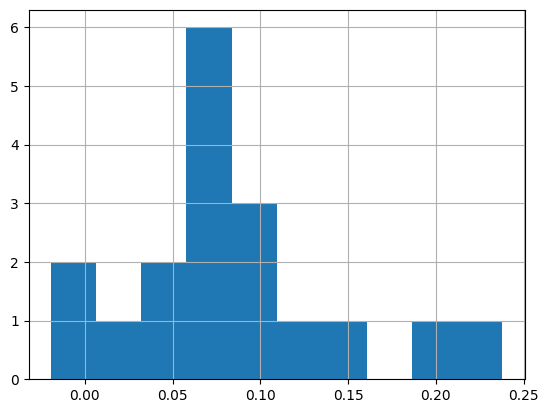

In [ ]:
(df_res_case.unstack().loc[:, ('Конечное давление, МПа', 1)].astype(float) - df_res.unstack().loc[:, ('p_out', 1)]).hist()

In [165]:
data_res_case = {'freq': [10, 20, 30], 'amp': [100, 200, 300]}
data_res = {'freq': [5, 15, 25], 'amp': [50, 150, 250]}

df_res_case = pd.DataFrame(data_res_case)
df_res = pd.DataFrame(data_res)
df_res.dtypes, df_res_case.dtypes

result = df_res_case - df_res

print(result)

   freq  amp
0     5   50
1     5   50
2     5   50
